In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
# CIFAR-10-Datensatz laden
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Labels abflachen
y_train = y_train.flatten()
y_test = y_test.flatten()

# Datensatz filtern, um nur 'Katze' (Klasse 3) und 'Hund' (Klasse 5) einzuschließen
cat_dog_train_mask = np.isin(y_train, [3, 5])
cat_dog_test_mask = np.isin(y_test, [3, 5])

x_train_cat_dog = x_train[cat_dog_train_mask]
y_train_cat_dog = y_train[cat_dog_train_mask]
x_test_cat_dog = x_test[cat_dog_test_mask]
y_test_cat_dog = y_test[cat_dog_test_mask]

# Labels umwandeln: 3 (Katze) -> 0, 5 (Hund) -> 1
y_train_cat_dog = np.where(y_train_cat_dog == 3, 0, 1)
y_test_cat_dog = np.where(y_test_cat_dog == 3, 0, 1)

# Bilder normalisieren (Pixelwerte von 0 bis 1)
x_train_cat_dog = x_train_cat_dog / 255.0
x_test_cat_dog = x_test_cat_dog / 255.0

In [4]:
# Definiere das CNN-Modell mit einem separaten Input-Layer
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),  # Definiere die Eingabeform
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),  # Erste Faltungsschicht
    tf.keras.layers.MaxPooling2D((2, 2)),  # Erste Pooling-Schicht
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Zweite Faltungsschicht
    tf.keras.layers.MaxPooling2D((2, 2)),  # Zweite Pooling-Schicht
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Dritte Faltungsschicht
    tf.keras.layers.MaxPooling2D((2, 2)),  # Dritte Pooling-Schicht
    tf.keras.layers.Flatten(),  # Faltungsergebnisse in ein eindimensionales Format bringen
    tf.keras.layers.Dense(128, activation='relu'),  # Vollständig verbundene Schicht
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binäre Klassifikationsausgabe (Katze oder Hund)
])

In [5]:
# Modell kompilieren
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Verlustfunktion für binäre Klassifikation
              metrics=['accuracy'])  # Genauigkeit als Metrik verwenden

# Zeige die Modellzusammenfassung
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,041 (621.25 KB)

 Trainable params: 159,041 (621.25 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Modell trainieren
history = model.fit(x_train_cat_dog, y_train_cat_dog, epochs=50, validation_data=(x_test_cat_dog, y_test_cat_dog))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5427 - loss: 0.6868 - val_accuracy: 0.6295 - val_loss: 0.6553
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6601 - loss: 0.6154 - val_accuracy: 0.6635 - val_loss: 0.6091
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7042 - loss: 0.5708 - val_accuracy: 0.7190 - val_loss: 0.5414
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7392 - loss: 0.5221 - val_accuracy: 0.7440 - val_loss: 0.5142
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7702 - loss: 0.4777 - val_accuracy: 0.7565 - val_loss: 0.5131
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7910 - loss: 0.4474 - val_accuracy: 0.7575 - val_loss: 0.4914
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8215 - loss: 0.4010 - val_accuracy: 0.7430 - val_loss: 0.5337
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8349 - loss: 0.3650 - val_accuracy: 0.

In [7]:
# Modell auf den Testdaten evaluieren
test_loss, test_acc = model.evaluate(x_test_cat_dog, y_test_cat_dog)
print(f'Testgenauigkeit: {test_acc:.3f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7514 - loss: 1.6013
Testgenauigkeit: 0.744


In [8]:
# Vorhersagen auf dem Testdatensatz machen
predictions = model.predict(x_test_cat_dog)
predictions = (predictions > 0.5).astype(int).flatten()  # Wahrscheinlichkeiten in binäre Labels umwandeln (0 oder 1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


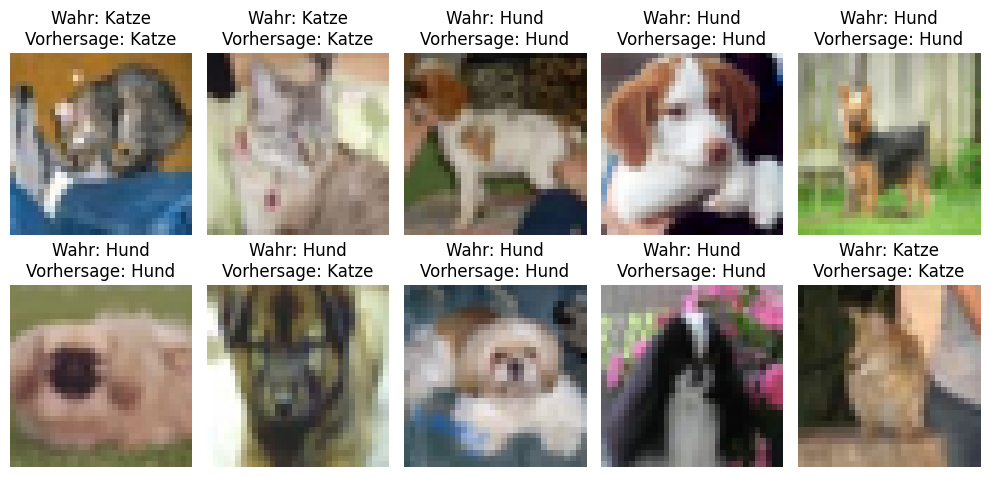

In [9]:
# Funktion zur Anzeige von Bildern mit höheren Auflösungen
def display_predictions(images, true_labels, predicted_labels, class_names, num_images=10):
    plt.figure(figsize=(10, 5))  # Erhöhe die Bildgröße für bessere Auflösung (20x10 Zoll)
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)  # Zeige 10 Bilder in einem Raster (2 Reihen, 5 Spalten)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        plt.title(f"Wahr: {true_label}\nVorhersage: {predicted_label}")
        plt.axis('off')
    plt.tight_layout()  # Sorgt dafür, dass der Text nicht abgeschnitten wird
    plt.show()

# Klassennamen für die Labels
class_names = ['Katze', 'Hund']

# Visualisiere die ersten 10 Vorhersagen
display_predictions(x_test_cat_dog, y_test_cat_dog, predictions, class_names, num_images=10)

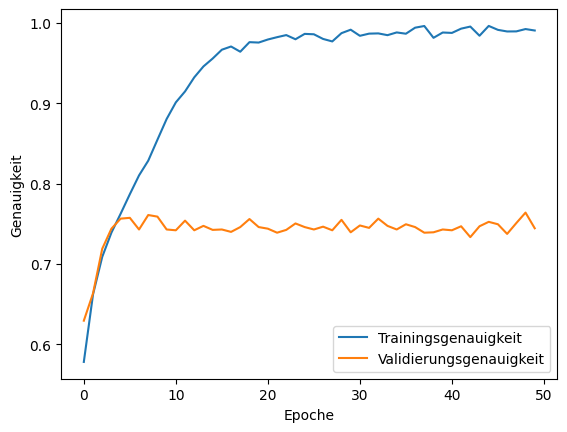

In [10]:
# Trainings- und Validierungsgenauigkeit plotten
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.xlabel('Epoche')
plt.ylabel('Genauigkeit')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


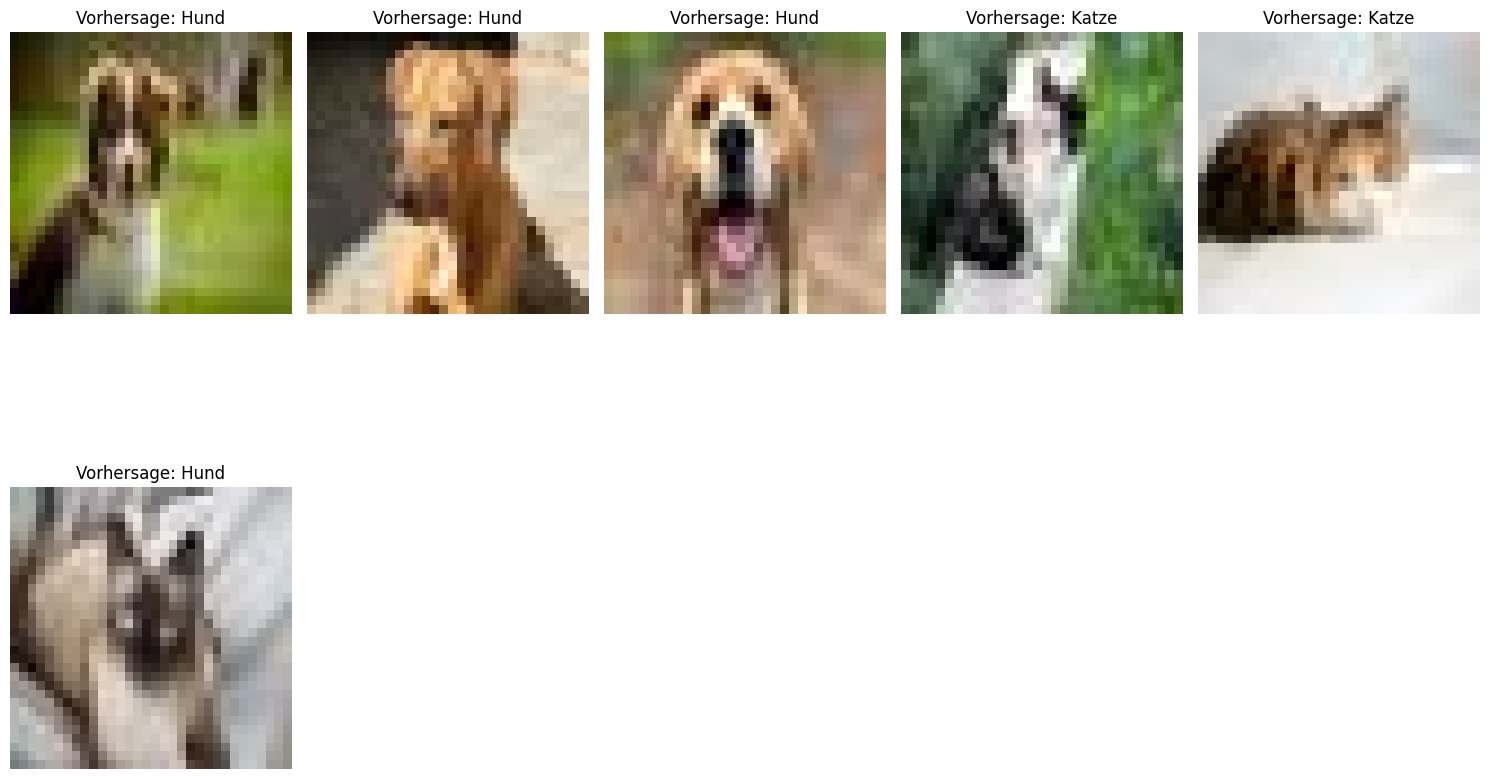

In [11]:
# Funktion zum Vorverarbeiten des Bildes (Skalieren und Normalisieren)
def preprocess_image(image_path, target_size=(32, 32)):
    img = Image.open(image_path)
    img_rgb = img.convert("RGB")  # Sicherstellen, dass das Bild im RGB-Format ist
    img_resized = img_rgb.resize(target_size)  # Bild auf 32x32 Pixel skalieren
    img_array = np.array(img_resized)  # Bild in ein NumPy-Array umwandeln
    img_array = img_array / 255.0  # Normalisieren (Pixelwerte auf den Bereich [0, 1] skalieren)
    img_array = np.expand_dims(img_array, axis=0)  # Eine Batch-Dimension hinzufügen
    return img_array

# Funktion, um Vorhersagen für Bilder aus einem Ordner zu machen und in einem Raster anzuzeigen
def classify_new_images_in_grid(model, input_folder, class_names, num_images=10, columns=5):
    images = []
    predictions = []
    
    # Alle Bilddateien im Ordner durchlaufen
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.webp')):  # Nur Bilddateien verarbeiten
            image_path = os.path.join(input_folder, filename)
            img_preprocessed = preprocess_image(image_path)
            
            # Vorhersage machen
            prediction = model.predict(img_preprocessed)
            predicted_class = class_names[int(prediction[0][0] > 0.5)]  # Wert explizit extrahieren
            
            # Bilder und Vorhersagen speichern
            images.append(Image.open(image_path))
            predictions.append(predicted_class)

            if len(images) >= num_images:  # Stoppe, wenn die gewünschte Anzahl von Bildern erreicht ist
                break

    # Falls weniger Bilder als erwartet gefunden wurden
    num_images = len(images)

    # Raster-Plot erstellen
    rows = (num_images + columns - 1) // columns  # Anzahl der Reihen
    plt.figure(figsize=(15, 5 * rows))  # Passe die Größe des Plots an die Anzahl der Reihen an
    for i in range(num_images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(images[i])
        plt.title(f"Vorhersage: {predictions[i]}")
        plt.axis('off')  # Achsen ausblenden
    plt.tight_layout()
    plt.show()

# Ordner-Pfad
input_folder = 'Bilder nach verarbeitung'

# Klassennamen definieren
class_names = ['Katze', 'Hund']

# Klassifiziere und zeige die Bilder im Raster an (mit Rücksicht auf die tatsächliche Anzahl von Bildern)
classify_new_images_in_grid(model, input_folder, class_names, num_images=10, columns=5)